In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn import datasets, linear_model
import numpy as np



In [130]:
df = pd.read_csv('build/sept8_meas1.txt')


In [131]:
df = df.rename(columns={'32': 'x', ' 32': 'y'})

In [132]:
df = df[df['x'] < 3500]

In [133]:
x = np.array(df['x'])
y = np.array(df['y'])

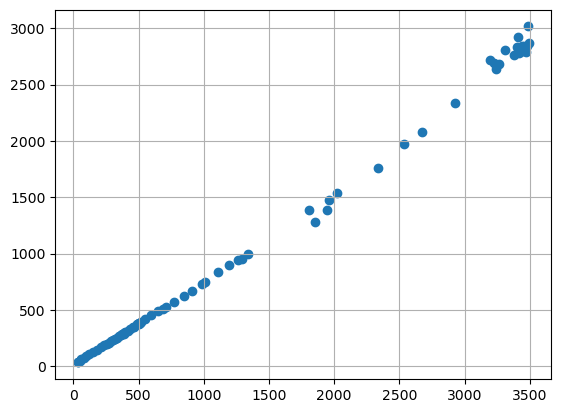

In [134]:
plt.scatter(df['x'], df['y'])
plt.grid()

In [135]:
coeff = np.polyfit(x, y, 2)

In [136]:
coeff

array([5.38877148e-05, 6.32678342e-01, 3.81395834e+01])

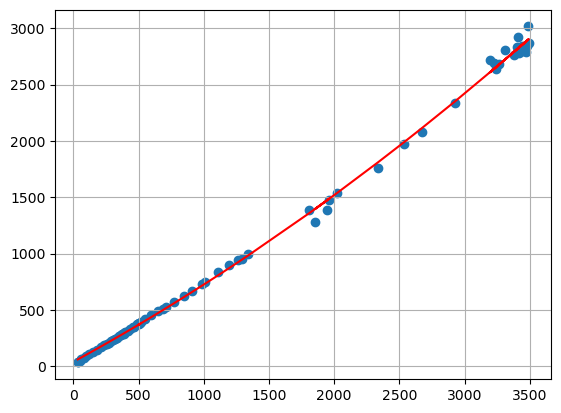

In [137]:
fit = coeff[0]*x**2 + coeff[1]*x + coeff[2]

plt.scatter(x, y)
plt.plot(x, fit, color='red')
plt.grid()
plt.show()

In [140]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=df['x'], y=df['y'], mode='markers'))

fig.add_trace(go.Scatter(x=df['x'], y=fit, mode='lines', name='Fit'))

fig.update_layout(
    title='Interactive Zoom',
    xaxis=dict(title='x'),
    yaxis=dict(title='y'),
    hovermode='closest',
    dragmode='zoom',
)

fig.show()

In [71]:
p = np.poly1d(coeff)
print(p)

           2
5.389e-05 x + 0.6327 x + 38.14


In [166]:
calc_inverse(coeff, 61)

36.022241119893806

In [64]:
x0 = (p - 4095).roots

In [65]:
p(x0)

array([4095., 4095.])

In [66]:
a = coeff[0]
b = coeff[1]
c = coeff[2]

In [164]:
def calc_inverse(coeff, input):
    a = coeff[0]
    b = coeff[1]
    c = coeff[2]
    
    phi = b/(2*a)
    output = -phi + np.sqrt(pow(phi,2) - (c-input)/a)
    return output

In [142]:
def evaluate_polynomial(coeff, input):
    p = np.poly1d(coeff)
    return p(input)

In [68]:
output

2547.9345033139116

In [98]:
fit = coeff[0]*x**2 + coeff[1]*x + coeff[2]

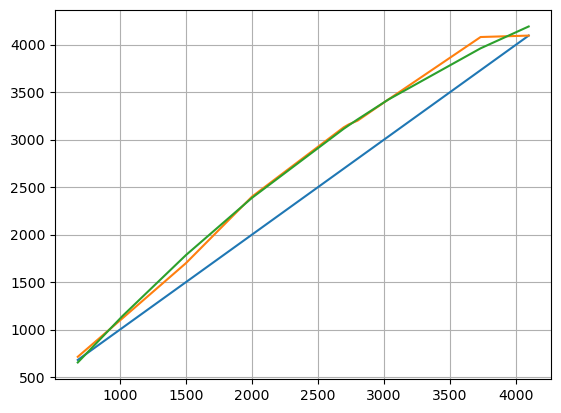

In [99]:
plt.plot(x, x)
plt.plot(x, y)
plt.plot(x, fit)
plt.grid()
plt.show()

In [103]:
df = (pd.read_csv(f"corrected.txt"))


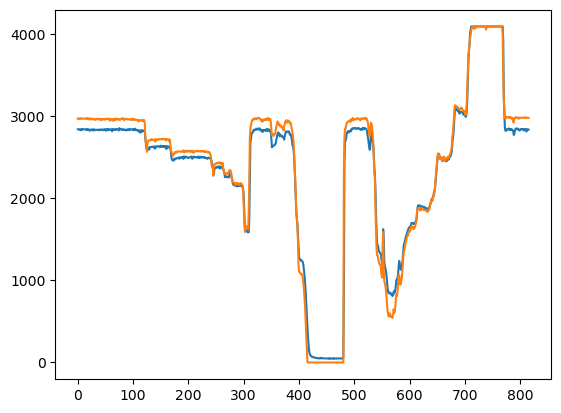

In [104]:

plt.plot(df.iloc[:,0])
plt.plot(df.iloc[:,1])


In [105]:

fig = px.line(df, x=df.index, y=df.columns)
fig.show()


468      713.533333
 3034    681.366667
dtype: float64

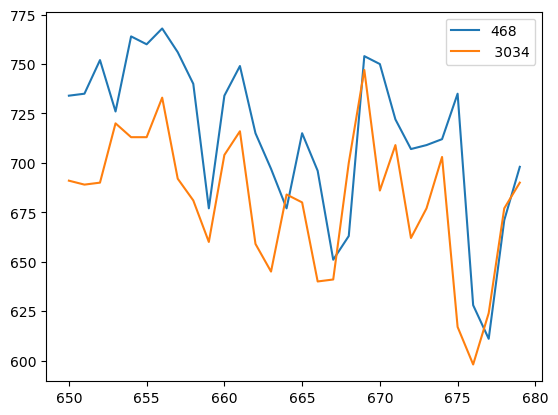

In [59]:
df[650:680].plot()
df[650:680].mean()

In [ ]:

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(df.iloc[:,0],bins=20)
b_heights, b_bins = np.histogram(df.iloc[:,1], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
#seaborn.despine(ax=ax, offset=10)

In [16]:
print(df.iloc[:,0].mean())
print(df.iloc[:,1].mean())

3105.418181818182
2651.5272727272727


In [4]:
file_count = 1

fig = go.Figure()
dfs = []
for i in range(0,file_count):
    df = (pd.read_csv(f"meas0.txt"))
    # df = (pd.read_csv(f"build/out{i}.txt"))
    dfs.append(df.sort_values(df.columns[0]))

    regr = linear_model.LinearRegression()
    x = dfs[i].iloc[:,0]
    x = x.values.reshape(len(x), 1)
    y = dfs[i].iloc[:,1]
    y = y.values.reshape(len(y), 1)
    regr.fit(x, y)
    print(regr.intercept_)
    print(regr.coef_)
    fig.add_trace(go.Scatter(x=dfs[i].iloc[:,0], y=dfs[i].iloc[:,1]))
    fig.add_trace(go.Scatter(x=x[:,0], y=regr.predict(x)[:,0]))
fig.show()

[-4.20266619]
[[0.85519237]]


In [35]:
dfs[0].iloc[:,0]

285    0.234448
284    0.255396
282    0.271509
283    0.273926
281    0.277954
         ...   
258    3.299194
259    3.299194
260    3.299194
247    3.299194
248    3.299194
Name: 2.316284, Length: 302, dtype: float64

In [37]:
regr = linear_model.LinearRegression()
x = dfs[0].iloc[:,0]
x = x.values.reshape(len(x), 1)
y = dfs[0].iloc[:,1]
y = y.values.reshape(len(y), 1)
regr.fit(x, y)

LinearRegression()

In [43]:
x.shape

(302, 1)

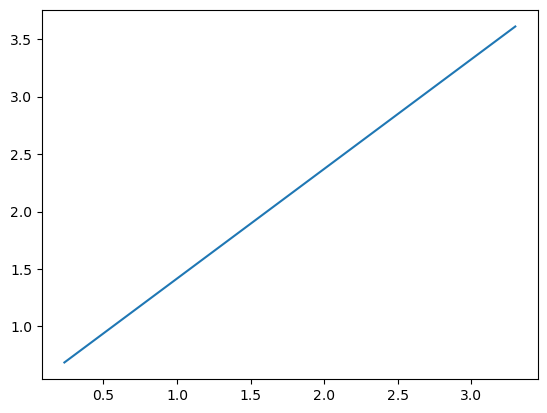

In [41]:
plt.plot(x, regr.predict(x))